In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from keras.optimizers import SGD
from keras.datasets import mnist

from personal.lenet import LeNet

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


## Loading MNIST dataset
    - train test split

In [2]:
((xtrain, ytrain), (xtest, ytest)) = mnist.load_data()
print('xtrain shape: {} | ytrain shape: {}'.format(xtrain.shape, ytrain.shape), '\n')
print('xtest shape: {} | ytest shape: {}'.format(xtest.shape, ytest.shape))

xtrain shape: (60000, 28, 28) | ytrain shape: (60000,) 

xtest shape: (10000, 28, 28) | ytest shape: (10000,)


## Reshaping and normalizing input matrices and one hot encode class labels

In [3]:
# reshape our input matrices to (no. of samples, height, width, depth)
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
print('xtrain shape: {} | xtest shape: {}'.format(xtrain.shape, xtest.shape))

xtrain shape: (60000, 28, 28, 1) | xtest shape: (10000, 28, 28, 1)


In [4]:
# normalizing input matrices and one hot encode class labels
xtrain = xtrain.astype(np.float32) / 255.0
xtest = xtest.astype(np.float32) / 255.0

lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

print('xtrain shape: {} | xtest shape: {}'.format(xtrain.shape, xtest.shape), '\n')
print('ytrain shape: {} | ytest shape: {}'.format(ytrain.shape, ytest.shape))

xtrain shape: (60000, 28, 28, 1) | xtest shape: (10000, 28, 28, 1) 

ytrain shape: (60000, 10) | ytest shape: (10000, 10)


## Global parameter settings

In [5]:
num_classes = 10
max_epochs = 20
batch_size = 128
learning_rate = 0.01

## Initializing the optimizer and training the network

In [6]:
opt = SGD(lr=learning_rate)

model = LeNet.build(width=28, height=28, depth=1, classes=num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=batch_size,
                   epochs=max_epochs, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 1.0228 - acc: 0.7325 - val_loss: 0.2900 - val_acc: 0.9198
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2528 - acc: 0.9259 - val_loss: 0.1882 - val_acc: 0.9458
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1787 - acc: 0.9471 - val_loss: 0.1405 - val_acc: 0.9570
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1384 - acc: 0.9588 - val_loss: 0.1125 - val_acc: 0.9677
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1148 - acc: 0.9663 - val_loss: 0.0942 - val_acc: 0.9718
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0995 - acc: 0.9700 - val_loss: 0.0923 - val_acc: 0.9719
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0881 - acc: 0.9737 - val_loss: 0.0858 - va

## Evaluating the network and classification report

In [10]:
ypred = model.predict(xtest, batch_size=batch_size)

# classification report
print(classification_report(ytest.argmax(axis=1),
                           ypred.argmax(axis=1),
                           target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Training loss and accuracy

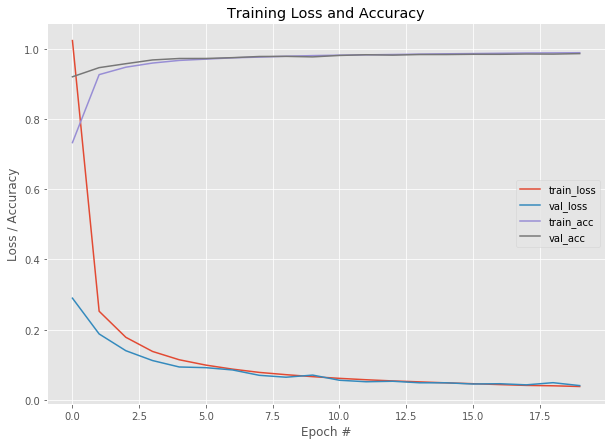

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))

plt.plot(np.arange(max_epochs), history.history['loss'], label='train_loss')
plt.plot(np.arange(max_epochs), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(max_epochs), history.history['acc'], label='train_acc')
plt.plot(np.arange(max_epochs), history.history['val_acc'], label='val_acc')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()